In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
from model.sim_setup import SIMULATION_TIME_STEPS
from model.parts.portfolio import Portfolio
from model.config import *
df = pd.read_pickle(r'utility_delegator.p')

# Read in no tax experiment frozen to show A/B
# df = pd.read_pickle(r'experiment_no_tax.p')

stakeDelegateds: 706 events
stakeDelegatedLockeds: 474 events
stakeDelegatedWithdrawns: 331 events
allocationCloseds: 84 events
allocationCollecteds: 18 events
stakeDepositeds: 36 events
rewardsAssigneds: 84 events
delegationParametersUpdateds: 9 events
allocationCreateds: 93 events
TOTAL NUMBER OF EVENTS: 1867
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1867 to capture all events.

running file: sim_setup.py
end of file: sim_setup.py


In [2]:
experiment = simulation_config

In [3]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{1: <class 'model.parts.utility_delegator.Util...,11474009,4,0,0,0,1,6,1
1,12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{1: <class 'model.parts.utility_delegator.Util...,11474009,4,0,0,0,1,6,2
2,18,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{1: <class 'model.parts.utility_delegator.Util...,11474307,4,0,0,0,1,6,3
3,24,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{1: <class 'model.parts.utility_delegator.Util...,11474332,4,0,0,0,1,6,4
4,30,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{1: <class 'model.parts.utility_delegator.Util...,11474426,4,0,0,0,1,6,5


In [44]:
df['delegator_portfolios'][1866][1].holdings

Decimal('10000000576.77218468959291563')

In [22]:
def delegator_across_indexers(delegator_id):
    indexer_delegations = {}
    delegations = delegator_id[1].delegations
    for i in delegations.keys():
        indexer_delegations[i] = delegator_id[1].delegations[i]

    return indexer_delegations    

In [94]:
def delegator_holdings(delegator_id):
    holdings = 0
    holdings = delegator_id[1].holdings
    return holdings



In [23]:
df['delegations'] = df['delegator_portfolios'].apply(lambda x: delegator_across_indexers(x))
df['delegations']

0                                                      {}
1                                                      {}
2                                                      {}
3                                                      {}
4                                                      {}
5                                                      {}
6                                                      {}
7                                                      {}
8                                                      {}
9                                                      {}
10                                                     {}
11                                                     {}
12                                                     {}
13                                                     {}
14                                                     {}
15                                                     {}
16                                                     {}
17            

In [95]:
df['holdings'] = df['delegator_portfolios'].apply(lambda x: delegator_holdings(x))

In [35]:
df['delegations'][1866]

{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': self.id=1, self.shares=Decimal('0E-22'), self.undelegated_tokens=Decimal('0E-21'),
 '0xfb5b40098cdfec1564ae5b94d4deed116b887d08': self.id=1, self.shares=Decimal('0E-22'), self.undelegated_tokens=Decimal('0E-21')}

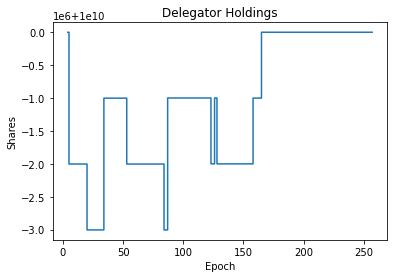

In [96]:
total_holdings = []
for i in df['holdings']:
    total_holdings.append(i)
plt.plot(df.epoch, total_holdings)
plt.xlabel('Epoch')
plt.ylabel('Shares')
plt.title('Delegator Holdings');

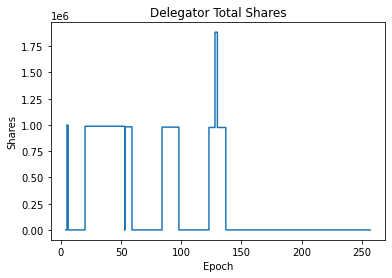

In [83]:
total_shares_list = []
total_shares = 0
for i in df['delegations']:
    total_shares = 0
    if i == {}:
        total_shares = 0
    else:
        for j in i.keys():
            total_shares += i[j].shares
    total_shares_list.append(total_shares)
plt.plot(df.epoch, total_shares_list)
plt.xlabel('Epoch')
plt.ylabel('Shares')
plt.title('Delegator Total Shares');

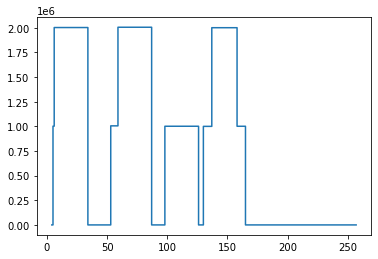

In [110]:
total = []
total_undelegated_tokens = 0
for i in df['delegations']:
    total_undelegated_tokens = 0
    if i == {}:
        total_undelegated_tokens = 0
    else:
        for j in i.keys():
            total_undelegated_tokens += i[j].undelegated_tokens
    total.append(total_undelegated_tokens)
len(total)
plt.plot(df.epoch, total)

1867
1867


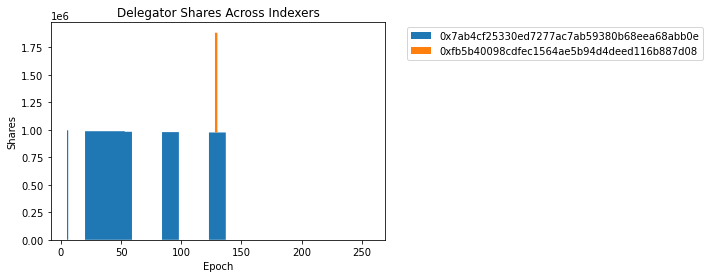

In [93]:
indexer_keys = df['delegations'][1866].keys()
total = {}
for i in indexer_keys:
    total[i] = []
timestep = 0
for i in df['delegations']:   
    if i == {}:
        for j in total.keys():
            total[j].append(0)
    else:
        for k in total.keys():
            if k in i:
                total[k].append(float(i[k].shares))
            else:
                total[k].append(0)
for i in total.keys():
    print(len(total[i]))
fig, ax = plt.subplots()
ax.stackplot(list(df.epoch), total.values(), labels = total.keys())
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('Epoch')
ax.set_ylabel('Shares')
ax.set_title('Delegator Shares Across Indexers')
plt.show();

1867
1867


Text(0.5, 1.0, 'Normalized Delegator Shares Across Indexers')

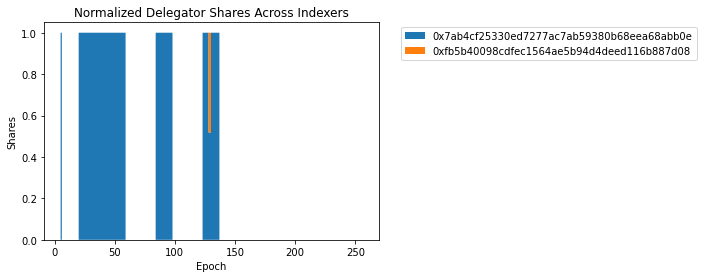

In [92]:
indexer_keys = df['delegations'][1866].keys()
total = {}
for i in indexer_keys:
    total[i] = []
timestep = 0
for i in df['delegations']:
    total_shares = 0   
    if i == {}:
        for j in total.keys():
            total[j].append(0)
    else:
        for l in i.keys():
            total_shares += i[l].shares
        for k in total.keys():
            if k in i:
                total[k].append(float(i[k].shares)/(float(total_shares)+ 0.00000000000000001))
            else:
                total[k].append(0)
for i in total.keys():
    print(len(total[i]))
fig, ax = plt.subplots()
ax.stackplot(list(df.epoch), total.values(), labels = total.keys())
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('Epoch')
ax.set_ylabel('Shares')
ax.set_title('Normalized Delegator Shares Across Indexers')

## Profit 

Text(0.5, 1.0, 'Total Profit of Utility Delegator')

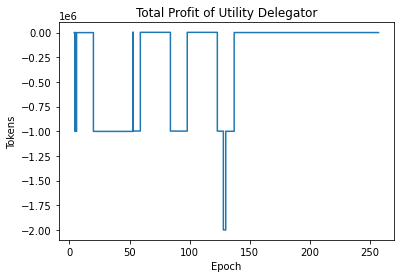

In [111]:
profit_list = []
for i, j in enumerate(df['delegations']):
    total_undelegated_tokens = 0
    if j == {}:
        total_undelegated_tokens = 0
    else:
        for k in j.keys():
            total_undelegated_tokens += j[k].undelegated_tokens
    profit_list.append(total_undelegated_tokens + df['holdings'][i] - df['holdings'][0])
plt.plot(df.epoch, profit_list)
plt.xlabel('Epoch')
plt.ylabel('Tokens')
plt.title('Total Profit of Utility Delegator')

1867
1867


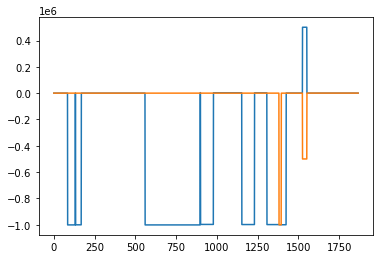

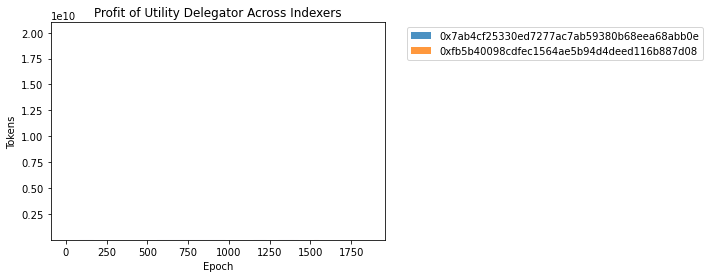

In [128]:
indexer_keys = df['delegations'][1866].keys()
total = {}
for i in indexer_keys:
    total[i] = []
timestep = 0
for i, j in enumerate(df['delegations']):
    total_undelegated = 0   
    if j == {}:
        for k in total.keys():
            total[k].append(0)
    else:
        for l in j.keys():
            total_undelegated += j[l].undelegated_tokens
        for m in total.keys():
            if m in j:
                total[m].append(float(j[m].undelegated_tokens) + ((float(df['holdings'][i] - df['holdings'][0]))/len(j)))
            else:
                total[m].append(0)
for i in total.keys():
    print(len(total[i]))
for i in total.keys():
    plt.plot(df.index, total[i])
fig, ax = plt.subplots()
ax.stackplot(list(df.index), total.values(), labels = total.keys(), alpha = 0.8)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('Epoch')
ax.set_ylabel('Tokens')
ax.set_title('Profit of Utility Delegator Across Indexers')
ax.set_ylim(1e4, 2.1e10);